# Data Analysis Project 8: Netflix Dataset

- https://youtu.be/b7Kd0fLwgO4?list=PLy3lFw0OTlutzXFVwttrtaRGEEyLEdnpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/netflix.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


## Q1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [4]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [5]:
df.drop_duplicates(inplace=True)

## Q2) Is there any Null Value present in any column ? Show with Heat-map.

In [6]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

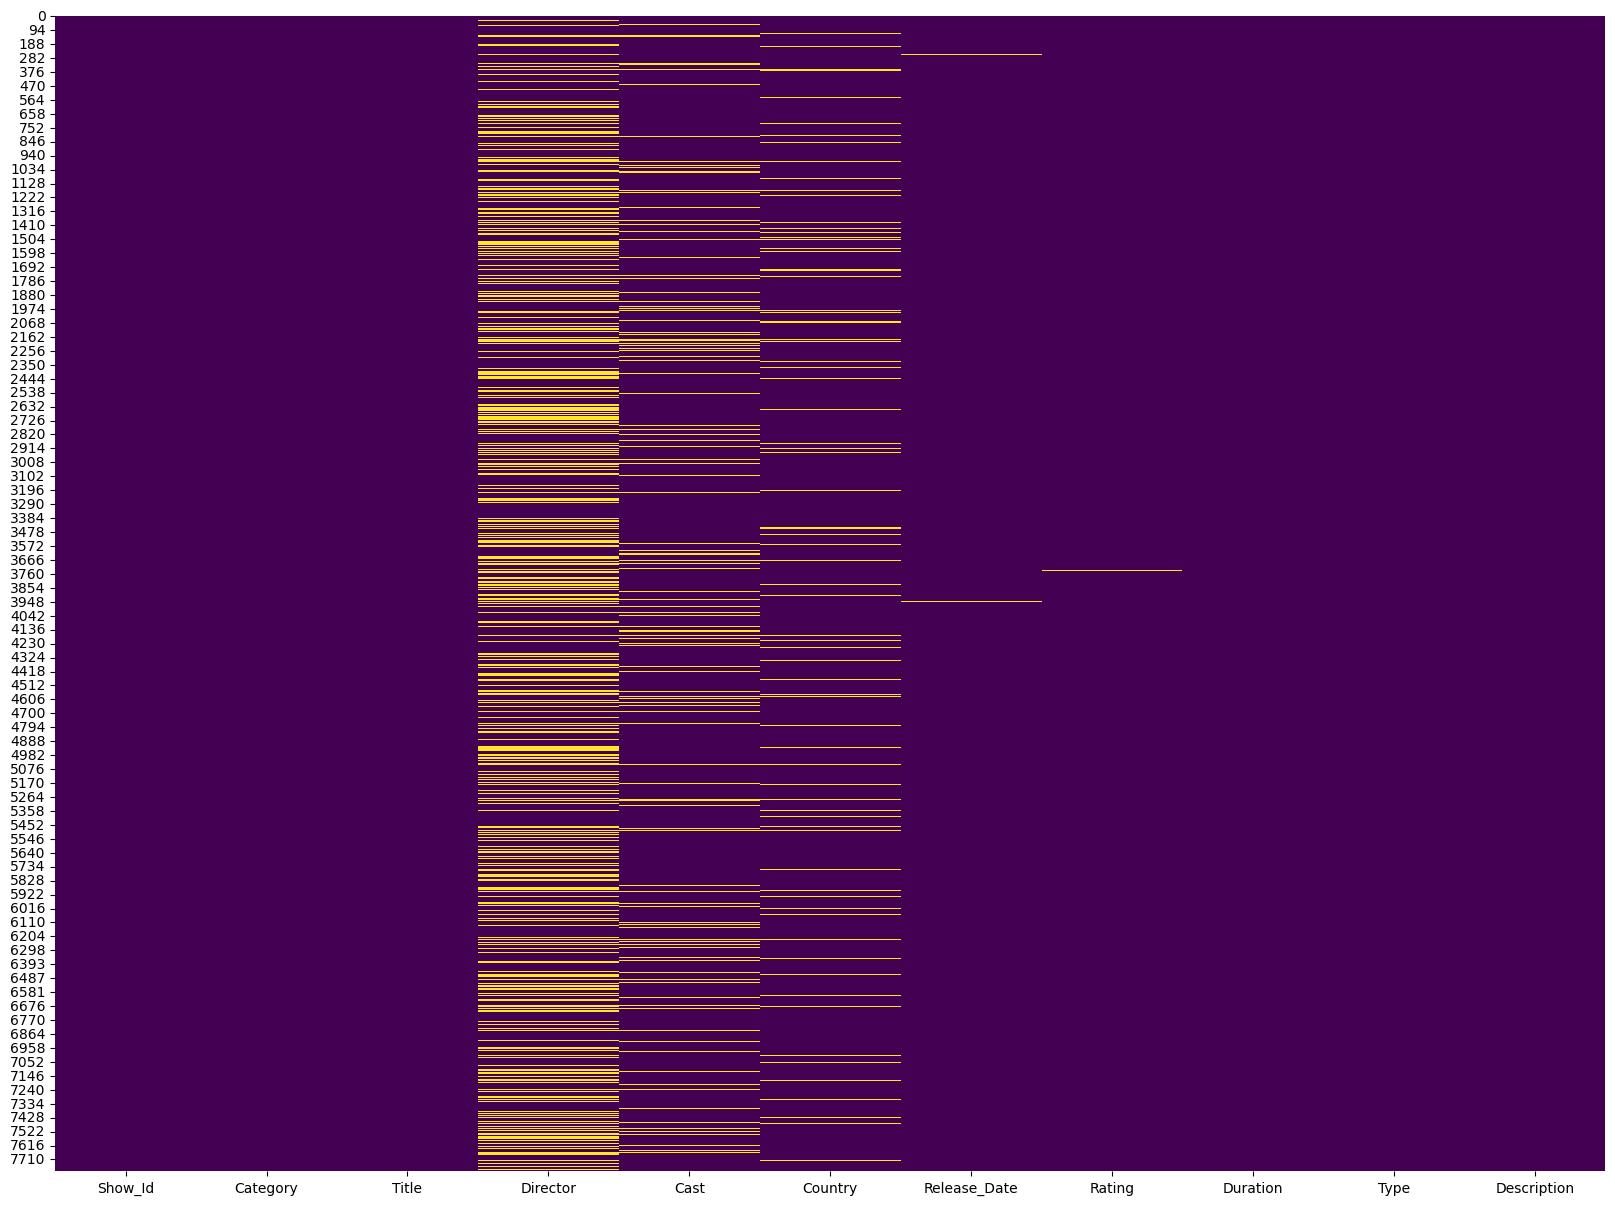

In [7]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## Q3) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [8]:
df[df['Title']=='House of Cards'][['Show_Id', 'Title', 'Director']]

,Show_Id,Title,Director
2832,s2833,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J..."


## Q4) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [9]:
df['Release_Date']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7784      October 19, 2020
7785         March 2, 2019
7786    September 25, 2020
7787      October 31, 2020
7788         March 1, 2020
Name: Release_Date, Length: 7787, dtype: object

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [11]:
df['Release_Date'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Release_Date, dtype: int64

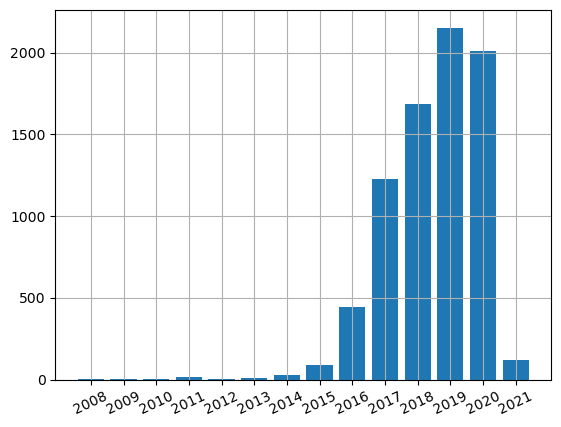

In [12]:
x = df['Release_Date'].dt.year.value_counts().index
y = df['Release_Date'].dt.year.value_counts().values

plt.bar(x=x, height=y)
plt.xticks(ticks=range(2008, 2022), rotation=25)
plt.grid()
plt.show()

## Q5) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

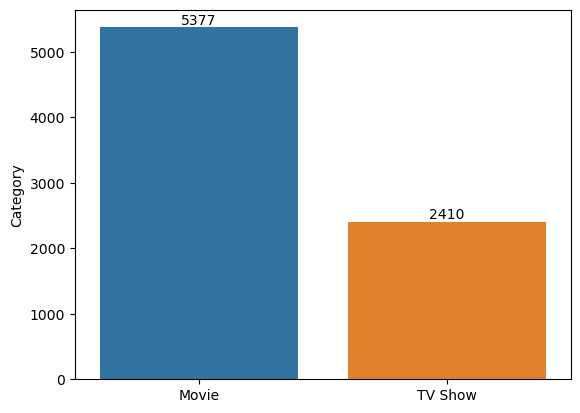

In [13]:
category_counts = df['Category'].value_counts()

# Create the bar plot
ax = sns.barplot(x=category_counts.index, y=category_counts)

# Add annotations for each bar
for i, count in enumerate(category_counts):
    ax.annotate(count, xy=(i, count), ha='center', va='bottom')

## Q6) Show all the Movies that were released in year 2021.

In [14]:
df[df['Release_Date'].dt.year==2021]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,2021-01-07,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m..."
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
104,s105,Movie,30 Minutes or Less,Ruben Fleischer,"Jesse Eisenberg, Danny McBride, Aziz Ansari, N...",United States,2021-01-01,R,83 min,"Action & Adventure, Comedies",Two crooks planning a bank heist wind up abduc...
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States",2021-01-16,PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b..."
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,2021-01-12,TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ..."
...,...,...,...,...,...,...,...,...,...,...,...
7353,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States",2021-01-01,PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...
7553,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
7571,s7570,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali..."
7572,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,2021-01-01,PG-13,118 min,"Classic Movies, Dramas, Independent Movies","In a backwater Iowa town, young Gilbert is tor..."


## Q7) Show only the Titles of all TV Shows that were released in India only.

In [15]:
mask = (df['Country']=='India') & (df['Category']=='TV Show')
df[mask][['Title']]

,Title
86,21 Sarfarosh: Saragarhi 1897
132,7 (Seven)
340,Agent Raghav
364,Akbar Birbal
533,Anjaan: Rural Myths
...,...
6249,The Creative Indians
6400,The Golden Years with Javed Akhtar
6469,The House That Made Me
7294,Typewriter


## Q8) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [16]:
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

## Q9) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [17]:
mask = (df['Category']=='Movie') & (df['Type'].apply(lambda x: 'Comedies' in x)) | (
    df['Country']=='United Kingdom')
df[mask]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2019-06-01,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ..."
...,...,...,...,...,...,...,...,...,...,...,...
7766,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,2019-05-21,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,2017-07-01,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the..."
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


## Q10) In how many movies/shows, Tom Cruise was cast ?

In [18]:
df[df['Cast'].apply(lambda x: 'Tom Cruise' in str(x))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


## Q11) What are the different Ratings defined by Netflix ?

In [19]:
df['Rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: Rating, dtype: int64

## Q12) How many Movies got the 'TV-14' rating, in Canada ?

In [20]:
df[(df['Category']=='Movie') & (df['Rating']=='TV-14') & (df['Country']=='Canada')].shape

(11, 11)

## Q13) How many TV Shows got the 'R' rating, after year 2018 ?

In [21]:
df[(df['Category']=='TV Show') & (df['Rating']=='R') & (df['Release_Date'].dt.year>=2018)].shape

(1, 11)

## Q14) What is the maximum duration of a Movie/Show on Netflix ?

In [22]:
sorted(df[df['Category']=='Movie']['Duration'].unique())

['10 min',
 '100 min',
 '101 min',
 '102 min',
 '103 min',
 '104 min',
 '105 min',
 '106 min',
 '107 min',
 '108 min',
 '109 min',
 '11 min',
 '110 min',
 '111 min',
 '112 min',
 '113 min',
 '114 min',
 '115 min',
 '116 min',
 '117 min',
 '118 min',
 '119 min',
 '12 min',
 '120 min',
 '121 min',
 '122 min',
 '123 min',
 '124 min',
 '125 min',
 '126 min',
 '127 min',
 '128 min',
 '129 min',
 '13 min',
 '130 min',
 '131 min',
 '132 min',
 '133 min',
 '134 min',
 '135 min',
 '136 min',
 '137 min',
 '138 min',
 '139 min',
 '14 min',
 '140 min',
 '141 min',
 '142 min',
 '143 min',
 '144 min',
 '145 min',
 '146 min',
 '147 min',
 '148 min',
 '149 min',
 '15 min',
 '150 min',
 '151 min',
 '152 min',
 '153 min',
 '154 min',
 '155 min',
 '156 min',
 '157 min',
 '158 min',
 '159 min',
 '16 min',
 '160 min',
 '161 min',
 '162 min',
 '163 min',
 '164 min',
 '165 min',
 '166 min',
 '167 min',
 '168 min',
 '169 min',
 '17 min',
 '170 min',
 '171 min',
 '172 min',
 '173 min',
 '174 min',
 '176 min',


Maximum duration of Movie: `312 minutes`.

In [23]:
sorted(df[df['Category']=='TV Show']['Duration'].unique())

['1 Season',
 '10 Seasons',
 '11 Seasons',
 '12 Seasons',
 '13 Seasons',
 '15 Seasons',
 '16 Seasons',
 '2 Seasons',
 '3 Seasons',
 '4 Seasons',
 '5 Seasons',
 '6 Seasons',
 '7 Seasons',
 '8 Seasons',
 '9 Seasons']

Maximum duration of TV Show: `16 Seasons`.

In [24]:
df[['duration_min', 'duration_unit']] = df['Duration'].str.split(" ", expand=True)
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,duration_min,duration_unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min


## Q15) Which individual country has the Highest No. of TV Shows ?

In [25]:
df[df['Category']=='TV Show']['Country'].value_counts().head(3)

United States     705
United Kingdom    204
Japan             157
Name: Country, dtype: int64

## Q16) How can we sort the dataset by Year ?

In [26]:
df['Release_Date'].dt.year.sort_values()

7115    2008.0
1765    2008.0
3248    2009.0
5766    2009.0
3840    2010.0
         ...  
3374       NaN
3492       NaN
3946       NaN
5138       NaN
6066       NaN
Name: Release_Date, Length: 7787, dtype: float64

In [27]:
year_sort_idx = df['Release_Date'].dt.year.sort_values().index
df.loc[year_sort_idx]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,duration_min,duration_unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",84,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,Seasons


## Q17) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [28]:
mask = ((df['Category']=='Movie') & (df['Type']=='Dramas')) | (
    (df['Category']=='TV Show') & (df['Type'].apply(lambda x: 'Kids' in str(x))))
df[mask]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,duration_min,duration_unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,119,min
108,s109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,2019-07-12,TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a...",2,Seasons
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2,Seasons
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,110,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2,Seasons
7761,s7760,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,3,Seasons
7768,s7767,TV Show,Zig & Sharko,NaN,NaN,France,2017-12-01,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",1,Season
7777,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,1,Season
